<a href="https://colab.research.google.com/github/abidshafee/DataScienceYouTubeTutorials/blob/master/Anomaly_detection_%7C_dealing_with_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anomaly and Outliers Detection in the dataset**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import style
style.use('ggplot')

### **Way to Upload Local File**

In [ ]:
from google.colab import files
file = files.upload()

Saving BreastCancer_data.csv to BreastCancer_data.csv


### **Way to connect google drive**


In [2]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


**Loading the file from the gdrive**

In [12]:
file = open('/content/gdrive/MyDrive/CSV_Datas-DataScience/BreastCancer_data.csv')

In [13]:
type(file)

_io.TextIOWrapper

In [14]:
#df = pd.read_csv("BreastCancer_data.csv")
df = pd.read_csv('/content/gdrive/MyDrive/CSV_Datas-DataScience/BreastCancer_data.csv')

In [15]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [16]:
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


**Let's get rid of the Empty column: 'Unnamed: 32'**

In [ ]:
df.dropna(axis=1, inplace=True)
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## **TIP: Renaming columns using a mapping:**
`df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]});`\
`df.rename(columns={"A": "a", "B": "c"})`\
[Reference>>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

In [ ]:
df.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "N_B_Flag1"}, inplace=True)

In [ ]:
df.head()

## **Univariate Outliers**
***Outliers in single feature***\
Using distribtion plot as well as scatter plot we can spot Univariate outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


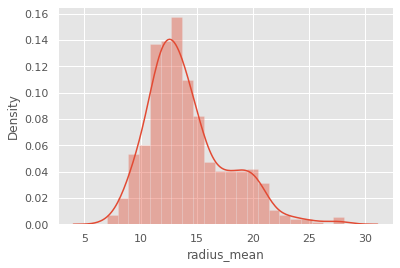

In [18]:
#distribution plot
sns.distplot(df[df.columns[2]])

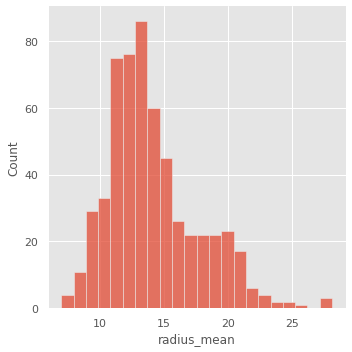

In [19]:
sns.displot(df[df.columns[2]], legend=True)

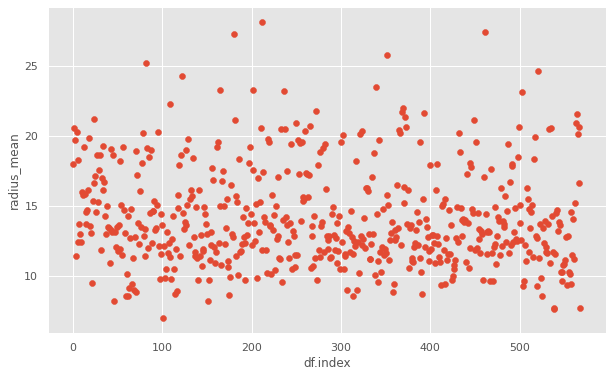

In [20]:
#spotting univariate outliers in scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df.index.values, df[df.columns[2]])
plt.xlabel('df.index')
plt.ylabel(df.columns[2])
plt.show()

### **box-and-whisker plot and box-and-whisker diagram.**

A boxplot is a standardized way of displaying the dataset based on a five-number summary: **the minimum**, **the maximum**, **the sample median**, the **first quartile**, and the **third quartile**.

**Minimum (Q0 or 0th percentile)**: the lowest data point excluding any outliers.

**Maximum (Q4 or 100th percentile)**: the largest data point excluding any outliers.

**Median (Q2 or 50th percentile)**: the middle value of the dataset.

**First quartile (Q1 or 25th percentile)**: also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

**Third quartile (Q3 or 75th percentile)**: also known as the upper quartile qn(0.75), is the median of the upper half of the dataset.[4]

An important element used to construct the box plot by determining the minimum and maximum data values feasible, but is not part of the aforementioned five-number summary, is the interquartile range or IQR denoted below:

Interquartile range (IQR) : is the distance between the upper and lower quartiles.

{\displaystyle {\text{IQR}}=Q_{3}-Q_{1}=q_{n}(0.75)-q_{n}(0.25)}{\displaystyle {\text{IQR}}=Q_{3}-Q_{1}=q_{n}(0.75)-q_{n}(0.25)}

[seaborn.boxplot>>](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

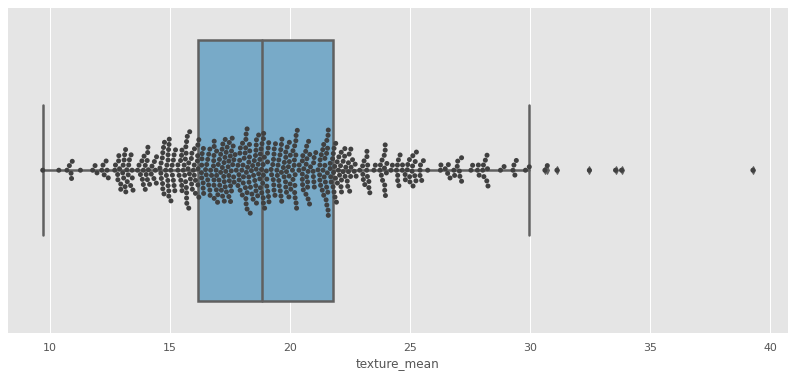

In [21]:
#Univariate outliers boxplot
ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x=df[df.columns[3]], data=df, hue='diagnosis', linewidth=2.5, orient="h", palette="Blues")
sns.swarmplot(x=df[df.columns[3]], color=".25")

# **Bivariate or Multivariate Outliers**

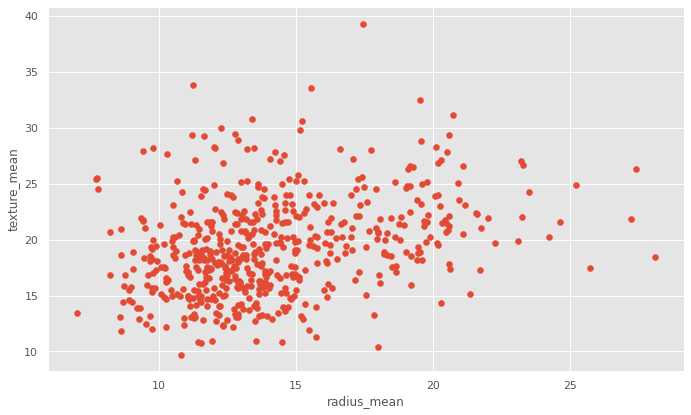

In [ ]:
#spotting univariate outliers in scatter plot
plt.figure(figsize=(11.4,6.7))
plt.scatter(df[df.columns[2]], df[df.columns[3]])
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])
plt.show()

# **Categorical Outliers**

Uploading Local File

In [ ]:
from google.colab import files
file = files.upload()

Saving cars.csv to cars.csv


In [ ]:
cars_data = pd.read_csv('cars.csv')

In [ ]:
cars_data.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.0,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.0,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83


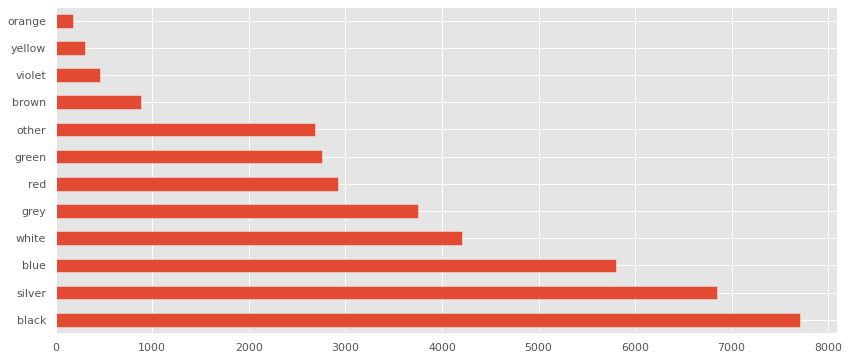

In [ ]:
plt.subplots(figsize=(14, 6))
cars_data['color'].value_counts().plot(kind='barh')

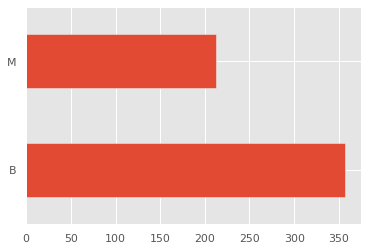

In [ ]:
diagnosis = df[df.columns[1]] #.count()
diagnosis.value_counts().plot(kind='barh')

# **Scatter plot with appropriate [Lagends]**

Loading iris dataset from sklearn datasets Modules

In [ ]:
#@title
iris = datasets.load_iris()
X = iris.data
y = iris.target
#target_names = iris.target_names

In [ ]:
#@title
type(target_names) #numpy.ndarray
species = ['setosa', 'versicolor', 'virginica']
type(species) #type: python list

list

In [ ]:
#@title
print(type(y))
y

## **Converting Python-list to numpy-array**
[Ref>>](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

In [ ]:
#@title
species = np.array(species)

In [ ]:
#@title
type(species)

numpy.ndarray

In [ ]:
#@title
species

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#@title
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

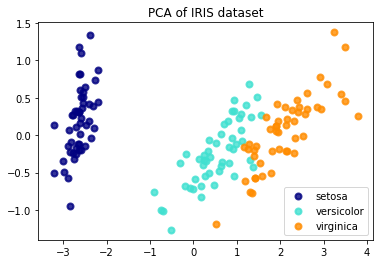

In [ ]:
#@title
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, specis in zip(colors, [0, 1, 2], species):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=specis)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

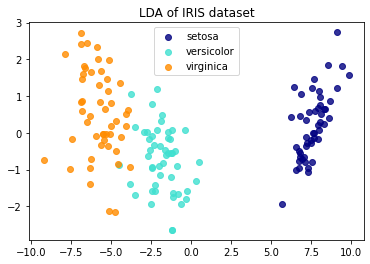

In [ ]:
#@title
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

# **Box plot, Normal Distribution, Correlation**

In [ ]:
import seaborn as sns

In [ ]:
nm_df.index

RangeIndex(start=0, stop=10127, step=1)

# **Machine Learning Model tips**

In [ ]:
corrmat=nm_df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(16,16)) 
#plot heat map 
g=sns.heatmap(nm_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can drop any feature that are highly correlated to reduce the dimentionality of the dataset. This will allow a machine learning model to predict with better accurecy.

## Find the ***Important Features*** in the dataset to input feature X

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
find_imp_ft_model = ExtraTreesRegressor()
find_imp_ft_model.fit(nm_df, Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(find_imp_ft_model.feature_importances_)

[0.31497602 0.09550662 0.04761562 0.04353273 0.04714254 0.04527455
 0.04784102 0.0444772  0.05632138 0.04967878 0.05312646 0.06003064
 0.04349857 0.05097787]


So here the feature importance score has been shown as column index order. Such as the Customer_Age feature has 31% importance to predict the target Y, and so on..

In [ ]:
nm_df.head(2)

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,N_B_Flag1
0,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057


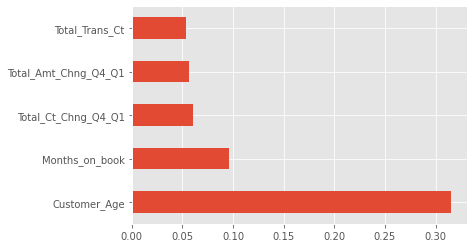

In [ ]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(find_imp_ft_model.feature_importances_, index=nm_df.columns) 
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

# **Sklearn Isolation Forest**